In [17]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier


In [4]:
titanic_df = pd.read_csv('train.csv')
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
columns_to_drop = [
    'PassengerId',
    'Name',
    'Ticket',
    'Cabin'
]

titanic_df.drop(columns_to_drop, axis=1, inplace=True)

In [8]:
target = 'Survived'
cat_col = [col for col in titanic_df.columns if titanic_df[col].dtypes == 'object' and titanic_df[col].name != target]
num_col = [col for col in titanic_df.columns if titanic_df[col].dtypes in ['int64', 'float64'] and titanic_df[col].name != target]

In [13]:
num_pipe = Pipeline([
    ('impute', SimpleImputer(strategy='mean')),
])

cat_pipe = Pipeline([
    ('impute', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

column_transform = ColumnTransformer([
    ('cat_pipe', cat_pipe, cat_col),
    ('num_pipe', num_pipe, num_col),
])

In [18]:
X = titanic_df[cat_col + num_col]
y = titanic_df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [15]:
# X_train = column_transform.fit_transform(X_train)
# X_test = column_transform.fit_transform(X_test)

array([[ 0.  ,  1.  ,  0.  , ...,  0.  ,  0.  , 10.5 ],
       [ 0.  ,  1.  ,  0.  , ...,  1.  ,  0.  , 53.1 ],
       [ 0.  ,  1.  ,  1.  , ...,  0.  ,  0.  , 15.05],
       ...,
       [ 0.  ,  1.  ,  0.  , ...,  0.  ,  2.  , 14.5 ],
       [ 1.  ,  0.  ,  0.  , ...,  0.  ,  1.  , 26.  ],
       [ 0.  ,  1.  ,  0.  , ...,  8.  ,  2.  , 69.55]])

# Fazendo pipeline para aplicar em um novo dataset

In [19]:
full_pipeline = Pipeline([
    ('preprocessor', column_transform),
    ('model', DecisionTreeClassifier())
])

In [20]:
full_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat_pipe',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['Sex', 'Embarked']),
                                                 ('num_pipe',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer())]),
                                                  ['Pclass', 'Age', 'SibSp',
                                                   'Parch', 'Fare'])])),
                ('model', DecisionTreeClassifier())])

In [22]:
y_pred = full_pipeline.predict(X_test)
y_pred

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 0], dtype=int64)

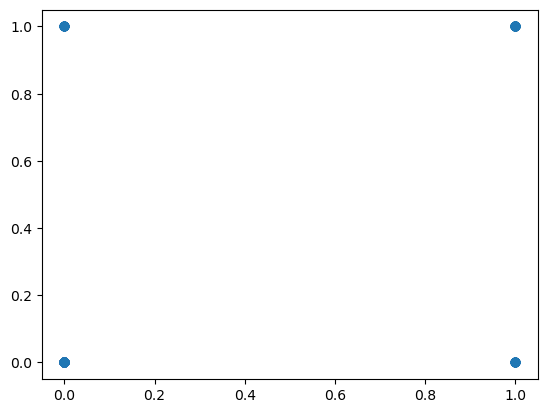